In [1]:
import cv2
import numpy as np
import os
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)



In [4]:
path = "n5.jpg"

In [5]:
image = cv2.imread(path)

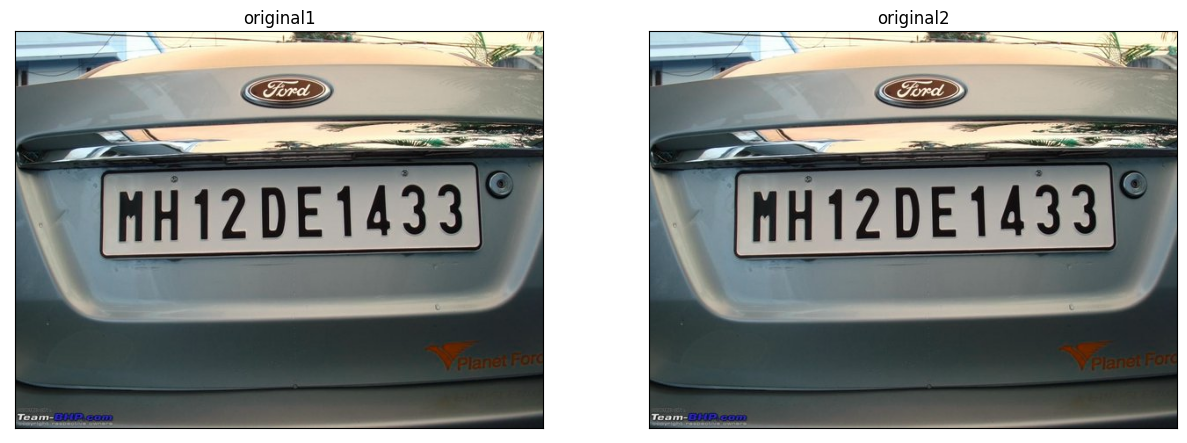

In [6]:
plot_images(image, image, title1='original1', title2='original2')

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

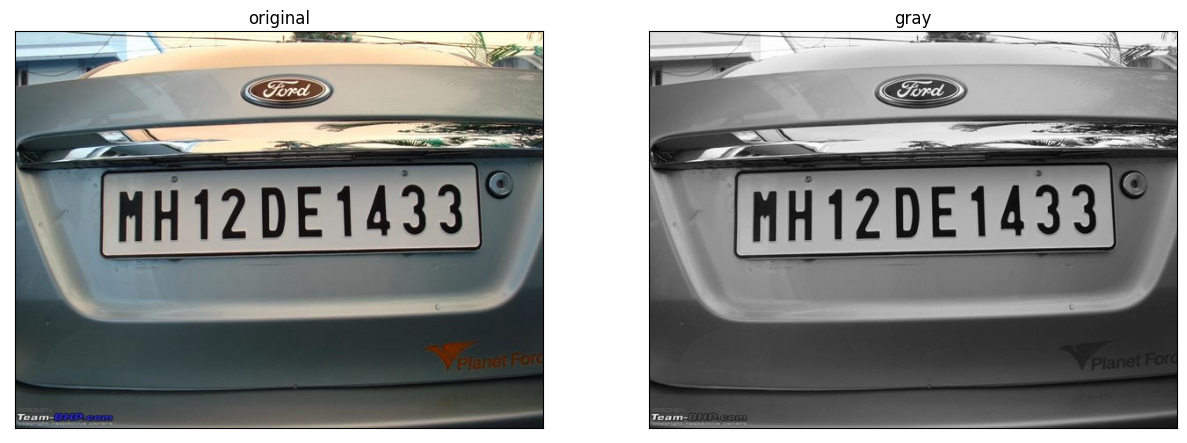

In [8]:
plot_images(image, gray, title1='original', title2='gray')

In [9]:
blur = cv2.bilateralFilter(gray, 11, 90, 90)

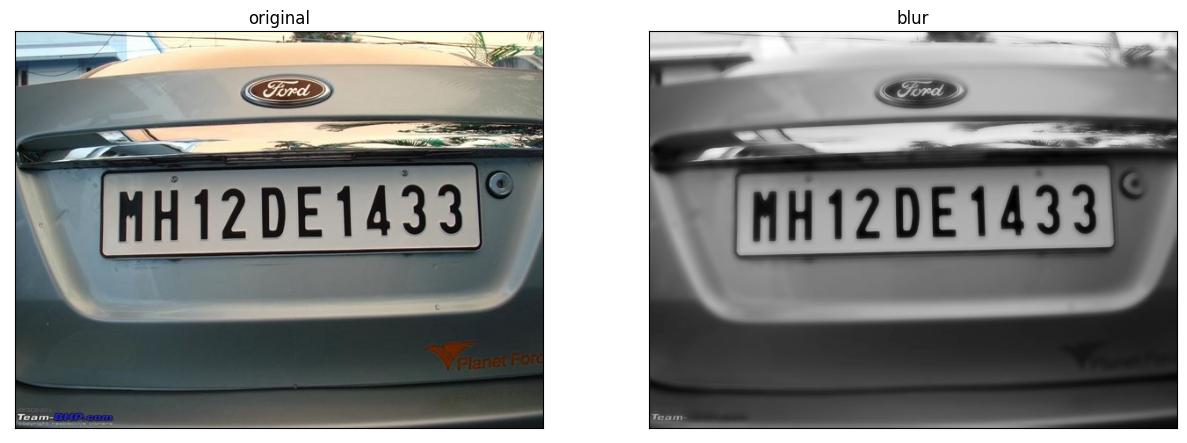

In [10]:
plot_images(image, blur, title1='original', title2='blur')

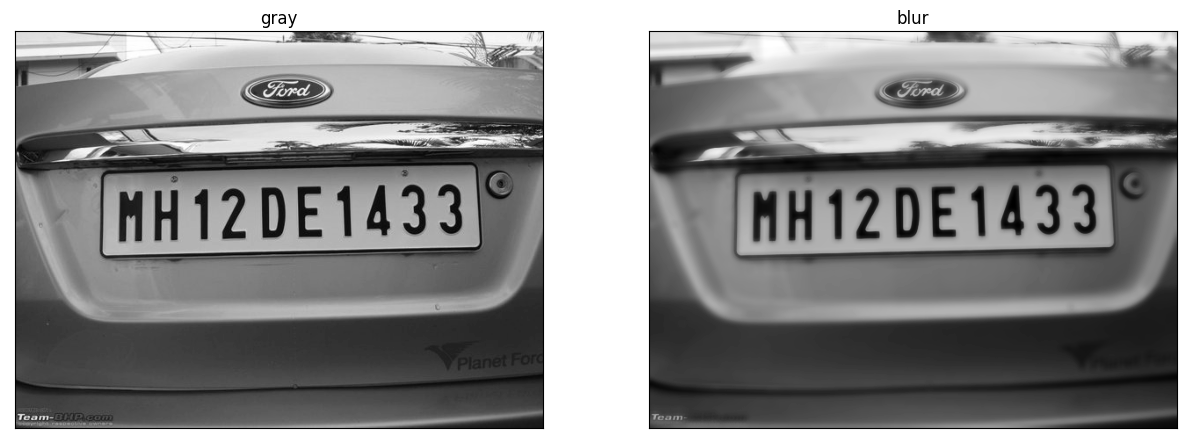

In [11]:
plot_images(gray, blur, title1='gray', title2='blur')

In [12]:
edges = cv2.Canny(blur, 30,200)

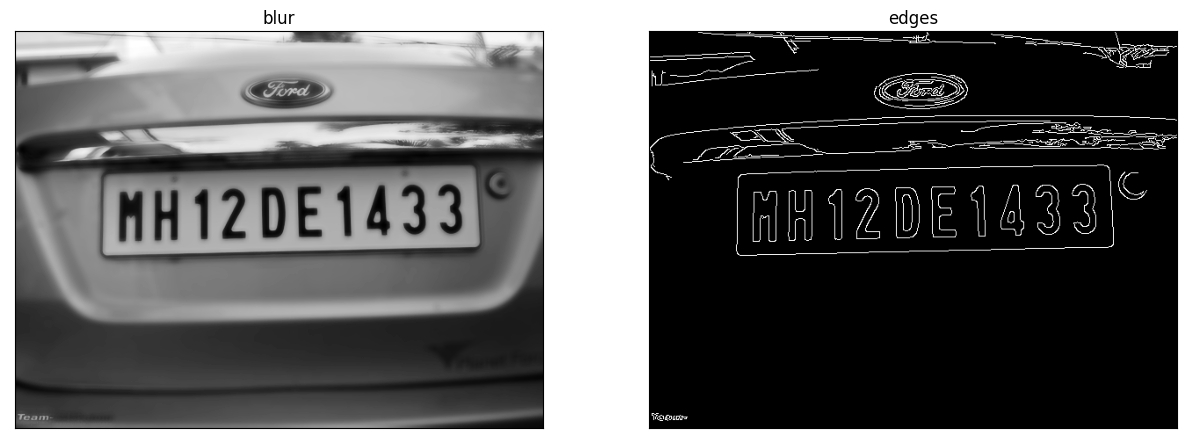

In [13]:
plot_images(blur, edges, title1='blur', title2='edges')

In [14]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
image_copy = image.copy()

_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

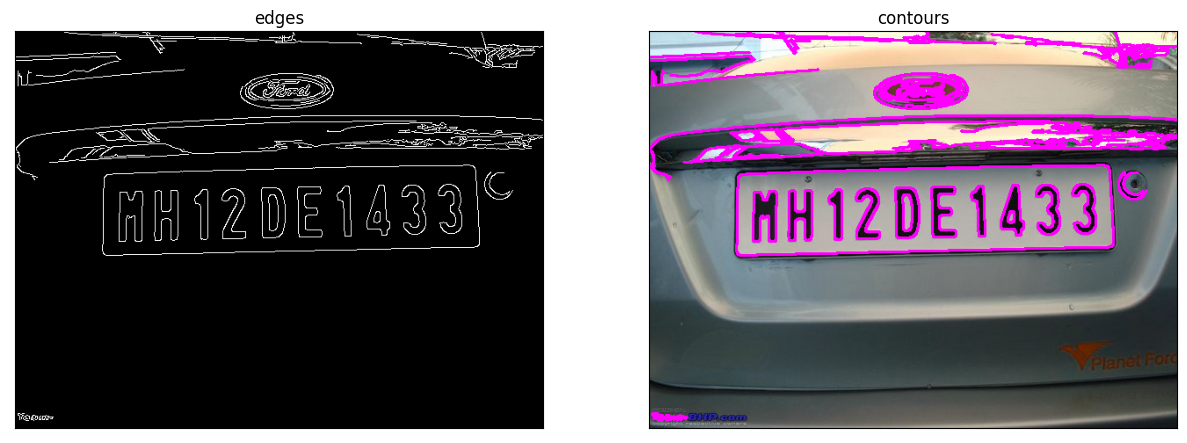

In [16]:
plot_images(edges, image_copy, title1='edges', title2='contours')

In [17]:
print(len(cnts))

122


In [18]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

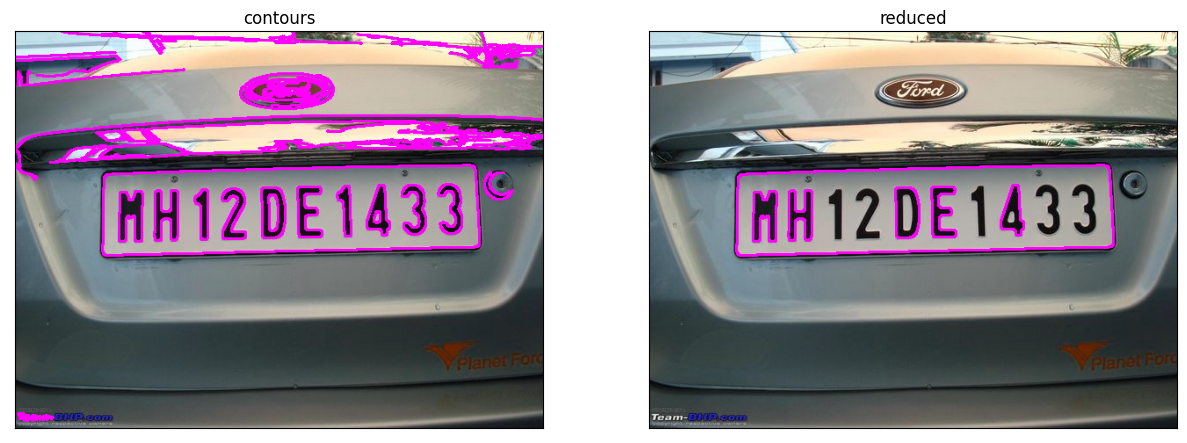

In [19]:
image_reduced_cnts = image.copy()
_ = cv2.drawContours(image_reduced_cnts, cnts, -1, (255,0,255),2)
plot_images(image_copy, image_reduced_cnts, title1='contours', title2='reduced')

In [20]:
print(len(cnts))

10


In [21]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_cont =cv2.approxPolyDP(c, 0.02*perimeter, True)
    if len(edges_cont) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break
cv2.imwrite("plate.png", plate)

True

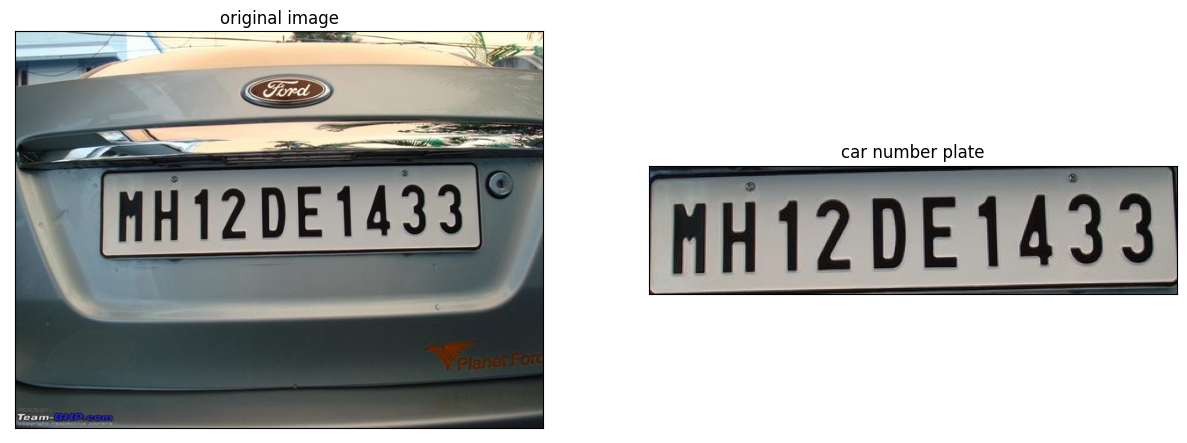

In [22]:
plot_images(image, plate, title1='original image', title2='car number plate')

In [23]:
import pytesseract
text = pytesseract.image_to_string(plate, lang='eng')

print(text)

MH12DE1433

